### 📑 자료 분석
- 천체의 각 지표에 따라 별, 은하, 퀘이사를 다중 분류하는 데이터 세트 

### Features
- obj_ID: 각 천체를 구분하기 위한 ID

- 천체의 각도
> - alpha: 천체의 우상향 각도
> - delta: 천체의 경사 각도

- 천체의 필터 지수 
> - u: 자외선 필터 지수
> - g: 녹색 필터 지수
> - r: 적색 필터 지수
> - i: 근적외선 필터 지수
> - z: 적외선 필터 지수

- 천체 촬영 관련 features
> - run_ID: 특정 촬영 별 ID
> - rerun_ID: 재영 ID
> - cam_col: 촬영 시 카메라의 열 위치 번호
> - field_ID: 각 필드 별 ID
> - spec_obj_ID: 관측한 천체의 ID (같은 천체 관측 시 값 동일)

- redshift: 적색 편이
- plate: SDSS(슬론 디지털 전천탐사)에서 각 플레이트의 ID
- MJD: SDSS가 데이터를 수집한 날짜(Julian Date)
- fiber_ID: 각 관측에서 평면에 있는 빛을 가리키는 섬유의 ID

### Target
- class: STAR(별), GALAXY(은하), QSO(퀘이사)의 3가지가 존재

### 🔎 데이터 세트 확인

In [1]:
import pandas as pd

st_df = pd.read_csv('./datasets/stellar_classification.csv')

st_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [2]:
# 데이터 세트 정보 확인
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

### 💻 데이터 전처리

#### 결측치 및 중복 검사 

In [3]:
st_df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [4]:
# 데이터 중복 검사
st_df.duplicated().sum()

0

#### 중간 분석
- 이 데이터 세트에서는 결측치와 중복이 발견되지 않음
- 따라서 바로 target(class 컬럼)의 레이블 인코딩 진행

### 레이블 인코딩
- target(class 컬럼)에 담긴 문자열 데이터를 레이블 인코딩으로 정수화
- 이는 target과 나머지 feature들 사이의 상관관계도를 출력하기 위함

In [5]:
# 레이블 인코딩 전 데이터 세트 복사
pre_st_df = st_df.copy()

pre_st_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [6]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()

# class에 레이블 인코딩을 적용한 값을 target 컬럼을 새로 만들어서 추가
pre_st_df['target'] = target_encoder.fit_transform(st_df['class'].tolist())

pre_st_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,target
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438,0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866,0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74,0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470,0


In [7]:
# 원본 데이터와 레이블 인코딩 후의 데이터 분포 비교
print(st_df['class'].value_counts())
print(pre_st_df['target'].value_counts())

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64
target
0    59445
2    21594
1    18961
Name: count, dtype: int64


In [8]:
# 필요없어진 class 컬럼은 제거
pre_st_df = pre_st_df.drop(labels=['class'], axis=1)

pre_st_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,target
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0.000000,9374,57749,438,0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0.404895,7626,56934,866,0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0.143366,2764,54535,74,0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0.455040,6751,56368,470,0


In [9]:
# 인코더에 클래스 지정이 잘 되었는지 출력
target_encoder.classes_

array(['GALAXY', 'QSO', 'STAR'], dtype='<U6')

### 👓 데이터 시각화

#### 타겟 데이터와의 상관관계 확인
- corr()을 이용하여 target과 각 컬럼의 상관관계도 확인
- 위 결과에 따라, 모델 학습에 불필요한 feature 제거

Text(0.5, 1.0, 'Correlation')

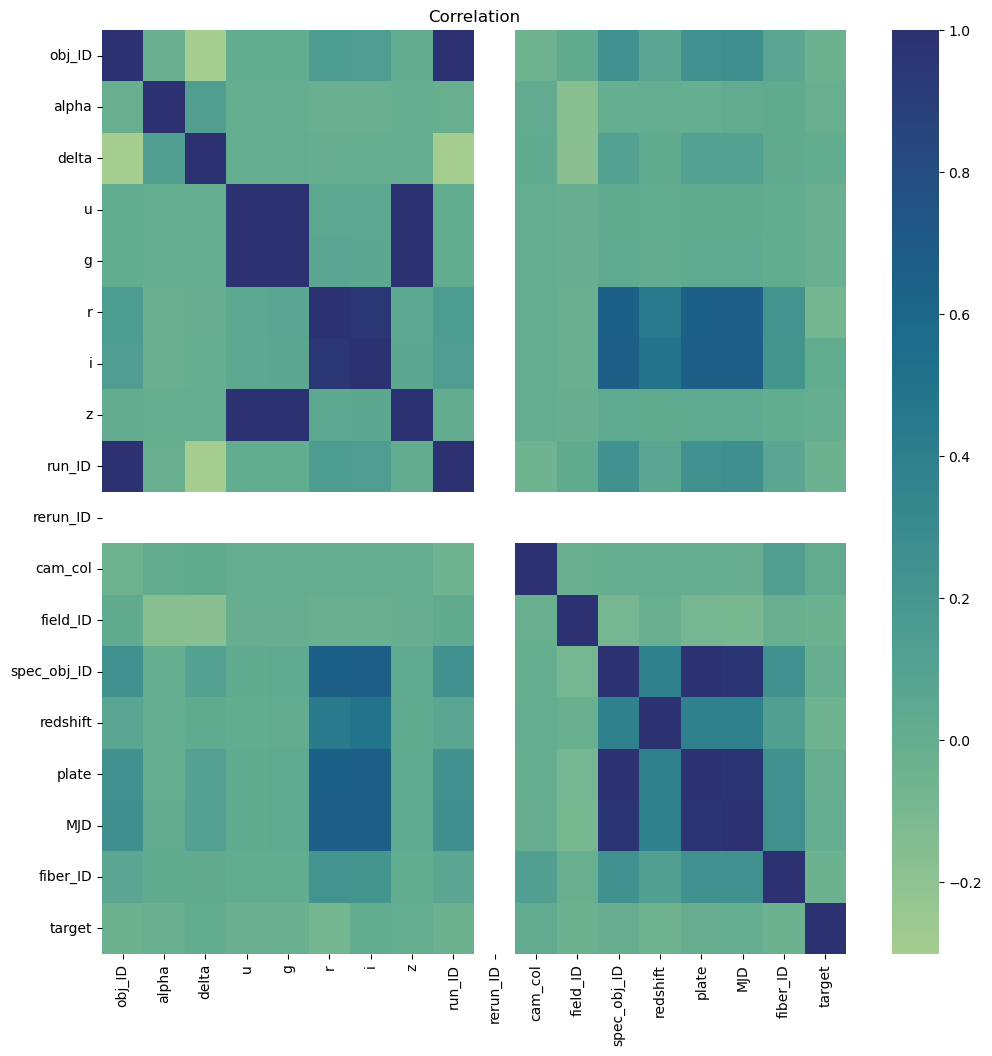

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 컬럼 간의 상관관계를 히트맵으로 출력
corr = pre_st_df.corr()
fig = plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr, cmap="crest")
heatmap.set_title("Correlation")

In [11]:
pd.set_option('display.max_rows', None)

# target과 feature들 사이의 상관관계를 데이터프레임 형식으로 출력
corr[['target']].sort_values(by="target", ascending=False)[1:]

,target
cam_col,0.023138
i,0.015028
delta,0.014452
MJD,-0.000405
z,-0.001614
plate,-0.010060
spec_obj_ID,-0.010060
alpha,-0.011756
g,-0.020066
u,-0.024645


In [12]:
# NaN의 상관관계를 보여준 rerun_ID의 데이터 분포 출력
pre_st_df['rerun_ID'].value_counts()

rerun_ID
301    100000
Name: count, dtype: int64

#### 중간 점검
- 단일값을 가지는 rerun_ID feature 제거
- 나머지 feature들은 target과 미약하게나마 상관관계를 가지고 있음
> - 만약 rerun_ID 외에도 상식적으로 천체 종류에 영향을 주지 않을 것 같은 feature들을 전부 제거하고 나면,  
target과 남은 feature들 사이의 상관관계에도 영향이 생길까?

### 불필요한 feature 제거
- rerun_ID 외에도 ~ID라고 적힌, 구분만을 위한 feature들은 전부 제거 후 상관관계 재확인

In [13]:
# fiber_ID의 데이터 분포 확인
pre_st_df['fiber_ID'].value_counts()

fiber_ID
637     159
105     158
597     158
611     154
321     154
621     151
564     149
409     148
563     148
571     146
411     146
333     145
639     144
57      144
365     144
601     143
95      143
351     142
439     142
523     142
389     142
101     142
481     141
269     141
123     140
565     140
340     140
599     140
557     140
559     140
277     140
619     140
293     140
264     139
475     139
175     139
531     138
197     138
581     138
525     138
189     138
325     138
533     137
391     137
529     136
539     136
626     136
363     136
503     136
285     135
379     135
323     135
487     135
455     135
593     135
399     135
3       135
400     135
572     134
310     134
613     134
457     134
540     134
562     134
598     134
341     134
276     134
311     134
631     134
412     134
97      134
255     133
577     133
257     133
235     133
459     132
117     132
297     132
201     132
55      132
401     132
47      132
515    

In [14]:
# field_ID의 데이터 분포 확인
pre_st_df['field_ID'].value_counts()

field_ID
71     472
65     458
67     449
60     448
69     447
72     446
68     445
74     442
81     442
125    436
58     433
64     431
70     430
77     430
62     430
83     428
110    428
73     427
98     427
112    427
109    425
61     424
88     423
94     421
51     420
53     420
91     418
66     418
113    418
63     417
111    417
118    415
84     414
85     411
101    411
114    411
97     410
59     410
75     409
89     407
100    405
104    405
79     403
119    402
87     398
136    397
56     397
82     397
86     397
96     397
50     396
133    396
49     396
92     395
103    395
123    393
76     393
108    391
116    391
117    390
115    390
102    389
78     389
122    385
124    385
120    384
54     384
131    384
121    383
55     383
52     383
126    381
143    379
90     378
135    378
39     378
132    378
48     375
144    375
41     375
57     371
105    371
154    370
99     369
37     369
46     369
128    368
95     368
145    365
141    365
9

#### 중간 점검
- 위 2가지 feature의 데이터 분포를 출력해본 건, 단순히 각 데이터를 구분하는 지표라면 제거하기 위함
- 하지만, 위 데이터들의 분포를 확인해봤을 때 특정 값이 여러 번 등장한 것을 확인
- 데이터 세트 업로더의 설명을 다시 확인하고 내린 추측으로는  
  위 데이터들은 특정 관측 장소나 각도를 구분하기 위한 지표인 것 같아 보였으며,  
  이는 같은 천체를 관측하더라도 판단에 영향을 줄 수 있는 지표라고 판단했기 때문에  
  위 2가지 feature들은 제거하지 않고 유지
- 비슷한 이유로 MJD feature 역시 제거하지 않고 유지

In [15]:
pd.set_option('display.max_rows', 10)

# 불필요한 feature를 파이썬 리스트 형태로 만들어서 변수에 할당
drop_columns = ['obj_ID', 'run_ID', 'rerun_ID', 'spec_obj_ID']

pre_st_df = pre_st_df.drop(labels=drop_columns, axis=1)

pre_st_df

,alpha,delta,u,g,r,i,z,cam_col,field_ID,redshift,plate,MJD,fiber_ID,target
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,79,0.634794,5812,56354,171,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,119,0.779136,10445,58158,427,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,120,0.644195,4576,55592,299,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,214,0.932346,9149,58039,775,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,137,0.116123,6121,56187,842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,2,581,0.000000,9374,57749,438,0
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,1,289,0.404895,7626,56934,866,0
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,4,308,0.143366,2764,54535,74,0
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,4,131,0.455040,6751,56368,470,0


#### 타겟 데이터와의 상관관계 재확인
- 불필요한 feature를 제거한 뒤, 각 컬럼 간의 상관관계에 변화가 생겼는지 확인

Text(0.5, 1.0, 'New Correlation')

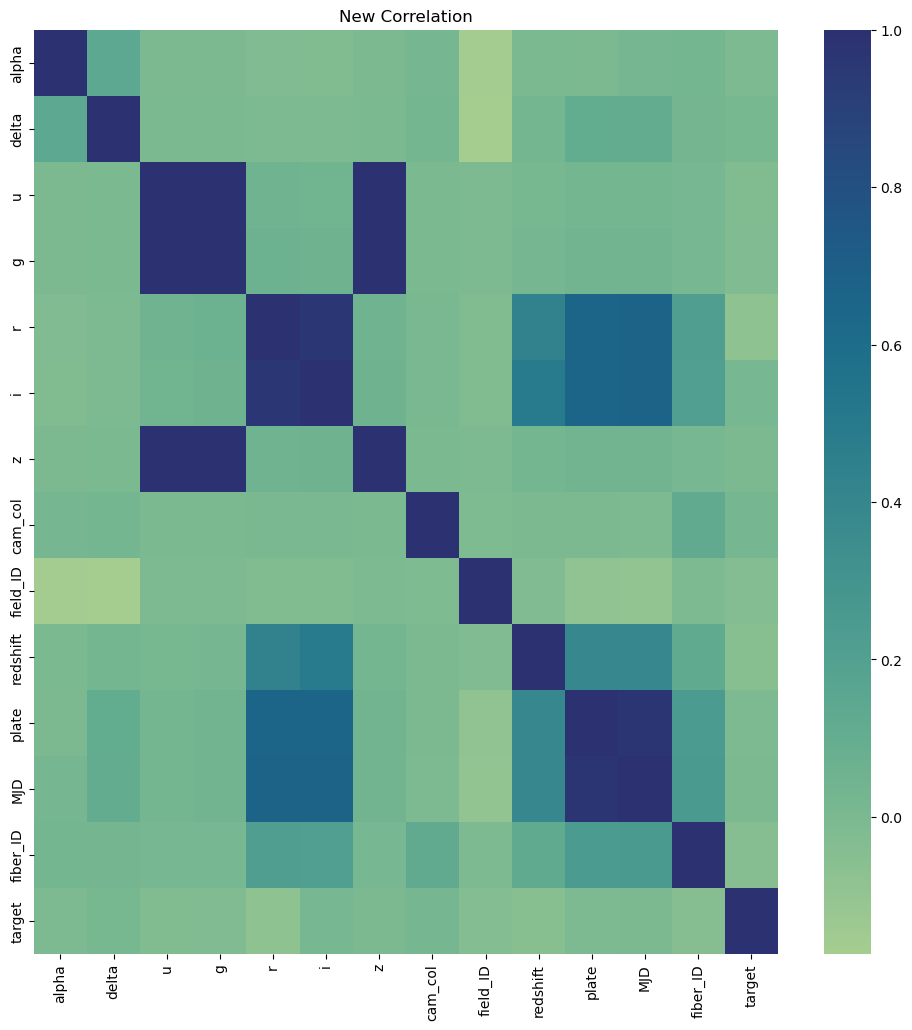

In [16]:
corr = pre_st_df.corr()
fig = plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr, cmap="crest")
heatmap.set_title("New Correlation")

In [17]:
pd.set_option('display.max_rows', None)

# target과 남은 feature들 사이의 상관관계를 데이터프레임 형식으로 출력
corr[['target']].sort_values(by="target", ascending=False)[1:]

,target
cam_col,0.023138
i,0.015028
delta,0.014452
MJD,-0.000405
z,-0.001614
plate,-0.010060
alpha,-0.011756
g,-0.020066
u,-0.024645
field_ID,-0.034833


#### 중간 분석
- 불필효한 feature들이 다른 feature들 사이의 상관관계에 영향을 미친다고 판단하여  
  해당 feature들을 제거했지만, target과의 상관관계에는 어떠한 변화도 없는 것을 확인
- 따라서 남은 데이터들의 분포를 시각화하고, 표준화로 이상치 제거

### 데이터 분포 시각화
- 각 컬럼의 데이터 분포를 히스토그램으로 시각화

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>, <Axes: title={'center': 'u'}>,
        <Axes: title={'center': 'g'}>],
       [<Axes: title={'center': 'r'}>, <Axes: title={'center': 'i'}>,
        <Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'cam_col'}>],
       [<Axes: title={'center': 'field_ID'}>,
        <Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'plate'}>,
        <Axes: title={'center': 'MJD'}>],
       [<Axes: title={'center': 'fiber_ID'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

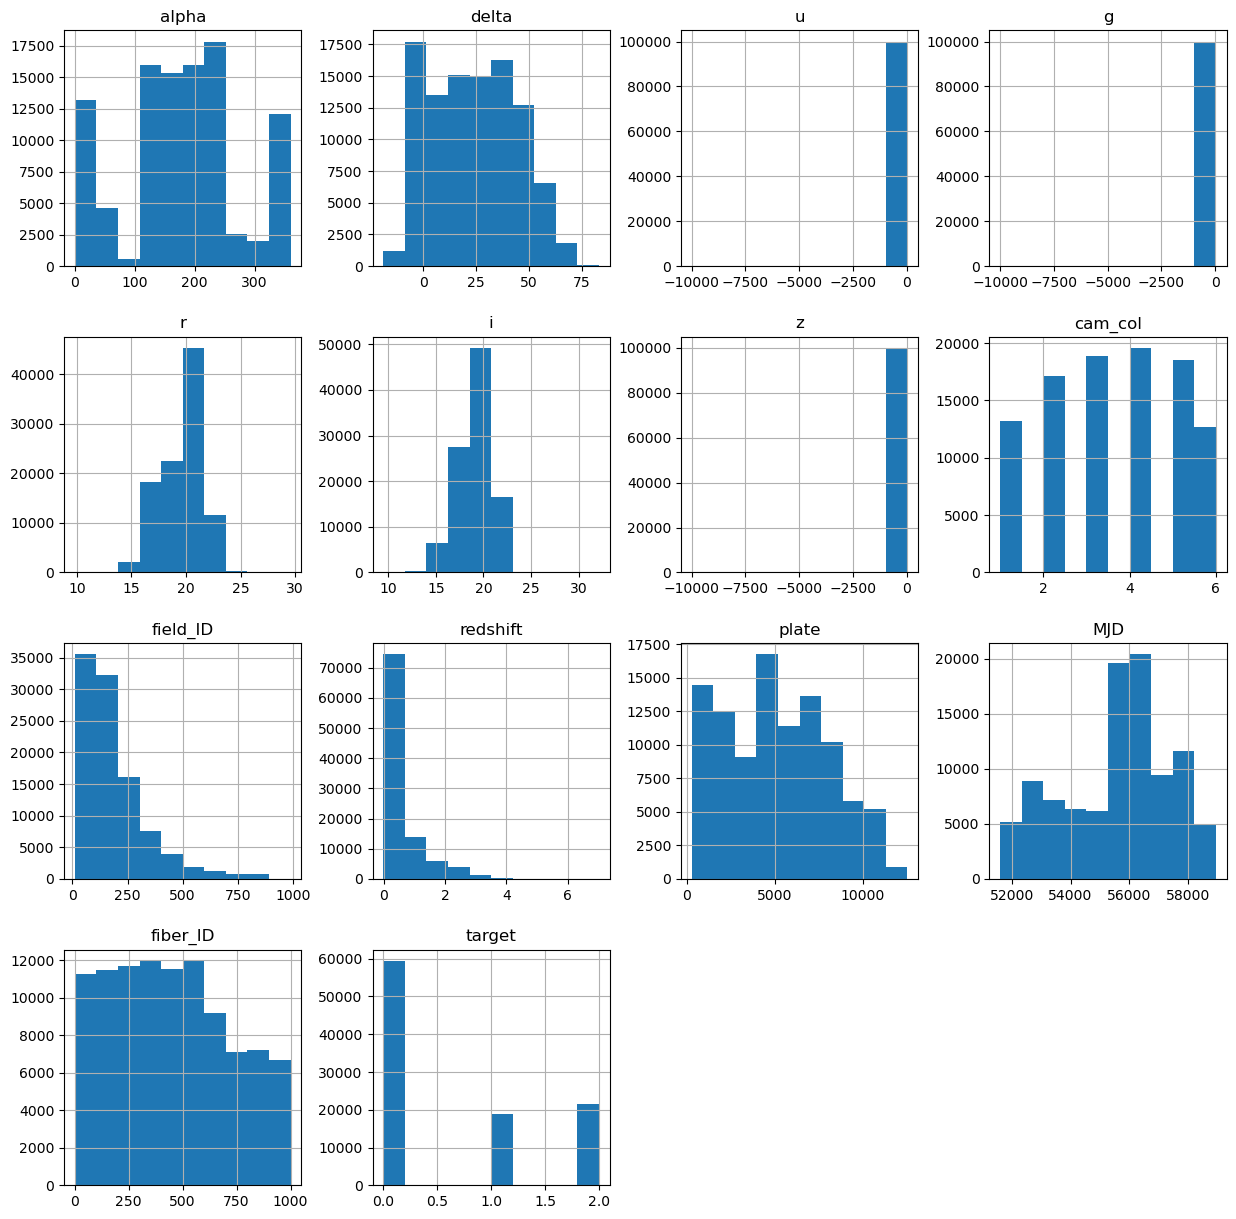

In [18]:
pre_st_df.hist(figsize=(15, 15))

### 이상치 제거
- feature들의 수치 데이터(평균, 최소/최대값, 사분위수 등) 확인
- 데이터 표준화 후 -1.96 ~ 1.96을 벗어나는 데이터 전부 제거

In [19]:
# 각 컬럼 별 수치 데이터 확인
pre_st_df.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,100000.0,177.629117,96.502241,0.005528,127.518222,180.900700,233.895005,359.999810
delta,100000.0,24.135305,19.644665,-18.785328,5.146771,23.645922,39.901550,83.000519
u,100000.0,21.980468,31.769291,-9999.000000,20.352353,22.179135,23.687440,32.781390
g,100000.0,20.531387,31.750292,-9999.000000,18.965230,21.099835,22.123767,31.602240
r,100000.0,19.645762,1.854760,9.822070,18.135828,20.125290,21.044785,29.571860
i,100000.0,19.084854,1.757895,9.469903,17.732285,19.405145,20.396495,32.141470
z,100000.0,18.668810,31.728152,-9999.000000,17.460677,19.004595,19.921120,29.383740
cam_col,100000.0,3.511610,1.586912,1.000000,2.000000,4.000000,5.000000,6.000000
field_ID,100000.0,186.130520,149.011073,11.000000,82.000000,146.000000,241.000000,989.000000
redshift,100000.0,0.576661,0.730707,-0.009971,0.054517,0.424173,0.704154,7.011245


In [20]:
from sklearn.preprocessing import StandardScaler 

pd.set_option('display.max_rows', 10)

# 데이터 표준화를 거진 feature들만 모아놓은 새로운 데이터프레임 생성
# 그 후, target 추가
std = StandardScaler()
std_st_features = std.fit_transform(pre_st_df.iloc[:, :-1])

std_st_df = pd.DataFrame(std_st_features, columns=pre_st_df.iloc[:, :-1].columns)
std_st_df['target'] = pre_st_df['target']

std_st_df

,alpha,delta,u,g,r,i,z,cam_col,field_ID,redshift,plate,MJD,fiber_ID,target
0,-0.434604,0.425529,0.059755,0.054926,0.403962,0.046007,0.003937,-0.952553,-0.718947,0.079557,0.228633,0.423203,-1.021342,0
1,-0.339921,0.363402,0.088045,0.072456,1.584406,1.185097,0.092835,0.937920,-0.450509,0.277096,1.797924,1.420729,-0.081883,0
2,-0.367251,0.582713,0.103327,0.067165,0.519745,0.150019,0.008808,-0.952553,-0.443798,0.092423,-0.190025,0.001854,-0.551612,0
3,1.669523,-1.249105,0.004921,0.102210,1.059904,0.807610,0.018321,-0.322395,0.187031,0.486770,1.358942,1.354927,1.195196,0
4,1.737310,-0.150242,-0.080055,-0.092948,-1.697421,-1.767887,-0.098468,-0.322395,-0.329712,-0.630267,0.333297,0.330860,1.441070,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.430113,-1.360650,0.005890,0.076991,1.217564,1.263237,0.065144,-0.952553,2.649947,-0.789186,1.435155,1.194571,-0.041515,0
99996,-1.535053,-0.220744,0.022371,0.058422,0.433626,0.382696,0.023527,-1.582710,0.690351,-0.235069,0.843071,0.743915,1.529144,0
99997,0.486606,-0.429360,-0.025538,-0.039730,-0.777184,-0.793290,-0.041496,0.307763,0.817859,-0.592984,-0.803786,-0.582617,-1.377309,0
99998,0.358952,1.146631,0.106075,0.034840,0.144547,-0.007005,-0.001386,0.307763,-0.369978,-0.166444,0.546691,0.430945,0.075917,0


In [21]:
pd.set_option('display.max_rows', None)

# 표준화 완료 후의 수치 데이터 출력
std_st_df.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,100000.0,-3.970513e-16,1.000005,-1.840625,-0.519274,0.033902,0.583056,1.889817
delta,100000.0,1.173817e-16,1.000005,-2.184860,-0.966605,-0.024912,0.802575,2.996514
u,100000.0,2.279066e-17,1.000005,-315.431359,-0.051248,0.006253,0.053731,0.339982
g,100000.0,2.815526e-17,1.000005,-315.574464,-0.049328,0.017904,0.050154,0.348687
r,100000.0,4.587974e-16,1.000005,-5.296504,-0.814090,0.258540,0.754292,5.351716
i,100000.0,-2.325322e-15,1.000005,-5.469610,-0.769429,0.182202,0.746147,7.427453
z,100000.0,-4.646949e-17,1.000005,-315.735974,-0.038078,0.010583,0.039470,0.337712
cam_col,100000.0,-6.764367e-17,1.000005,-1.582710,-0.952553,0.307763,0.937920,1.568078
field_ID,100000.0,7.332801e-17,1.000005,-1.175291,-0.698814,-0.269314,0.368226,5.388012
redshift,100000.0,-3.993250e-17,1.000005,-0.802831,-0.714577,-0.208686,0.174480,8.806011


In [22]:
# 각 feature 별 이상치 개수 출력
std_features = std_st_df.iloc[:, :-1]

for column in std_features.columns:
    print(f'{column}: {std_st_df[~std_st_df[column].between(-1.96, 1.96)].shape[0]}건')

alpha: 0건
delta: 1926건
u: 1건
g: 1건
r: 3555건
i: 3270건
z: 1건
cam_col: 0건
field_ID: 5426건
redshift: 6256건
plate: 2597건
MJD: 2446건
fiber_ID: 1162건


In [23]:
# 각 feature 별 이상치 제거
for column in std_features.columns:
    std_st_df.drop(
        std_st_df[~std_st_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)

In [24]:
# 남은 이상치 개수가 0건인지 확인
for column in std_features.columns:
    print(f'{column}: {std_st_df[~std_st_df[column].between(-1.96, 1.96)].shape[0]}건')

alpha: 0건
delta: 0건
u: 0건
g: 0건
r: 0건
i: 0건
z: 0건
cam_col: 0건
field_ID: 0건
redshift: 0건
plate: 0건
MJD: 0건
fiber_ID: 0건


In [25]:
# 현재 데이터 세트 상태와 수치 데이터 확인
std_st_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78389 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alpha     78389 non-null  float64
 1   delta     78389 non-null  float64
 2   u         78389 non-null  float64
 3   g         78389 non-null  float64
 4   r         78389 non-null  float64
 5   i         78389 non-null  float64
 6   z         78389 non-null  float64
 7   cam_col   78389 non-null  float64
 8   field_ID  78389 non-null  float64
 9   redshift  78389 non-null  float64
 10  plate     78389 non-null  float64
 11  MJD       78389 non-null  float64
 12  fiber_ID  78389 non-null  float64
 13  target    78389 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 9.0 MB


In [26]:
std_st_df.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,78389.0,0.038267,0.993903,-1.840625,-0.488556,0.049370,0.614953,1.889817
delta,78389.0,0.021049,0.959239,-1.958568,-0.860517,0.043967,0.809668,1.959824
u,78389.0,0.008726,0.068067,-0.210837,-0.046672,0.011545,0.057805,0.231205
g,78389.0,0.007574,0.059958,-0.155575,-0.044354,0.021306,0.052582,0.348687
r,78389.0,0.037254,0.909390,-1.959963,-0.734057,0.264228,0.734987,1.957998
i,78389.0,0.016685,0.895232,-1.959947,-0.695872,0.165583,0.668625,1.958805
z,78389.0,0.003960,0.050330,-0.130609,-0.034169,0.009459,0.036061,0.337712
cam_col,78389.0,-0.005383,0.998856,-1.582710,-0.952553,0.307763,0.937920,1.568078
field_ID,78389.0,-0.178451,0.694670,-1.175291,-0.725658,-0.323001,0.207163,1.958720
redshift,78389.0,-0.176907,0.615055,-0.802831,-0.715117,-0.236904,0.075636,1.959881


In [27]:
pd.set_option('display.max_rows', 10)

std_st_df

,alpha,delta,u,g,r,i,z,cam_col,field_ID,redshift,plate,MJD,fiber_ID,target
0,-0.434604,0.425529,0.059755,0.054926,0.403962,0.046007,0.003937,-0.952553,-0.718947,0.079557,0.228633,0.423203,-1.021342,0
1,-0.339921,0.363402,0.088045,0.072456,1.584406,1.185097,0.092835,0.937920,-0.450509,0.277096,1.797924,1.420729,-0.081883,0
2,-0.367251,0.582713,0.103327,0.067165,0.519745,0.150019,0.008808,-0.952553,-0.443798,0.092423,-0.190025,0.001854,-0.551612,0
3,1.669523,-1.249105,0.004921,0.102210,1.059904,0.807610,0.018321,-0.322395,0.187031,0.486770,1.358942,1.354927,1.195196,0
4,1.737310,-0.150242,-0.080055,-0.092948,-1.697421,-1.767887,-0.098468,-0.322395,-0.329712,-0.630267,0.333297,0.330860,1.441070,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1.446791,-1.263329,-0.031956,-0.022524,-0.163851,0.035415,0.012263,-0.952553,-0.819611,-0.549408,-1.392821,-1.299242,-1.461714,0
99996,-1.535053,-0.220744,0.022371,0.058422,0.433626,0.382696,0.023527,-1.582710,0.690351,-0.235069,0.843071,0.743915,1.529144,0
99997,0.486606,-0.429360,-0.025538,-0.039730,-0.777184,-0.793290,-0.041496,0.307763,0.817859,-0.592984,-0.803786,-0.582617,-1.377309,0
99998,0.358952,1.146631,0.106075,0.034840,0.144547,-0.007005,-0.001386,0.307763,-0.369978,-0.166444,0.546691,0.430945,0.075917,0


In [28]:
# pre_st_df에서 이상치가 발생한 행 제거
pre_st_df = pre_st_df.iloc[std_st_df.index].reset_index(drop=True)

pre_st_df

,alpha,delta,u,g,r,i,z,cam_col,field_ID,redshift,plate,MJD,fiber_ID,target
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,79,0.634794,5812,56354,171,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,119,0.779136,10445,58158,427,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,120,0.644195,4576,55592,299,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,214,0.932346,9149,58039,775,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,137,0.116123,6121,56187,842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78384,317.246996,-0.682254,20.96526,19.81625,19.34186,19.14711,19.05790,2,64,0.175206,1025,53239,51,0
78385,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,1,289,0.404895,7626,56934,866,0
78386,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,4,308,0.143366,2764,54535,74,0
78387,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,4,131,0.455040,6751,56368,470,0


In [29]:
pd.set_option('display.max_rows', None)

# 현재 수치 데이터 확인
pre_st_df.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,78389.0,181.321917,95.913399,0.005528,130.482624,182.393393,236.973181,359.999810
delta,78389.0,24.548796,18.843834,-14.339922,7.230830,24.999021,40.040891,62.635199
u,78389.0,22.257682,2.162439,15.282360,20.497750,22.347230,23.816880,29.325650
g,78389.0,20.771858,1.903683,15.591850,19.123140,21.207860,22.200860,31.602240
r,78389.0,19.714859,1.686692,16.010520,18.284270,20.135840,21.008980,23.277360
i,78389.0,19.114185,1.573717,15.639490,17.861590,19.375930,20.260220,22.528210
z,78389.0,18.794448,1.596865,14.524850,17.584690,18.968920,19.812940,29.383740
cam_col,78389.0,3.503068,1.585089,1.000000,2.000000,4.000000,5.000000,6.000000
field_ID,78389.0,159.539425,103.512994,11.000000,78.000000,138.000000,217.000000,478.000000
redshift,78389.0,0.447394,0.449423,-0.009971,0.054122,0.403554,0.631929,2.008753


In [30]:
# 현재 target의 분포 출력
pre_st_df['target'].value_counts()

target
0    50144
2    17608
1    10637
Name: count, dtype: int64

#### 중간 분석
- 이상치 제거 완료
- 단, target의 데이터 분포가 0(GALAXY)에 치우쳐있기 때문에,  
  아래의 데이터 세트 분할 과정에서 SMOTE를 통한 오버 샘플링 실행

### 데이터 세트 분할

In [31]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE

# 데이터 세트를 학습용과 테스트용으로 분할
features, targets = pre_st_df.iloc[:, :-1], pre_st_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
                        train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# SMOTE로 오버 샘플링 실행
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# SMOTE 적용 전후의 데이터 분포 출력
print(f'SMOTE 적용 전:\n{y_train.value_counts()}')
print(f'SMOTE 적용 후:\n{y_train_over.value_counts()}')

SMOTE 적용 전:
target
0    40115
2    14086
1     8510
Name: count, dtype: int64
SMOTE 적용 후:
target
0    40115
2    40115
1    40115
Name: count, dtype: int64


### 🤖 프로젝트의 방향성
- 이번 데이터 세트는 다중 분류이기 때문에, 정밀도와 재현율 각각보다는  
  그 두 가지의 기하 평균값인 F1 Score가 높은 모델을 선정하는 것이 좋을 것으로 판단

- 또한 산점도와 분류 영역을 시각화할 수 있는 모델은  
  해당 그래프를 바탕으로 과적합 발생 여부도 확인

### 학습 진행
- 여러 가지 분류 모델을 통한 학습 진행

> 1. DTC (DecisionTreeClassifier)

> 2. SVM (SVC)

> 3. KNN (KNeighborsClassifier)

### 1. DTC (결정 트리 분류 모델)

In [32]:
from sklearn.tree import DecisionTreeClassifier

# 우선, 별도의 하이퍼 파라미터 설정 없이 학습 진행
dtc = DecisionTreeClassifier(random_state=124)

dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=124)

In [33]:
from sklearn.tree import export_graphviz

# graphviz를 이용하여 위 모델의 분류 알고리즘을 .dot 파일로 생성
export_graphviz(
    dtc,
    out_file="./images/stellar_dtc01.dot",
    class_names=target_encoder.classes_,
    feature_names=features.columns,
    impurity=True,
    filled=True
)

In [34]:
import graphviz

# 위 과정으로 생성된 .dot 파일 불러오기
with open('./images/stellar_dtc01.dot') as f:
    stellar_dtc01 = f.read()

stellar_dtc01_graph = graphviz.Source(stellar_dtc01)

In [35]:
# 불러온 파일을 .png로 저장
stellar_dtc01_graph.render(filename='stellar_dtc01', directory='./images', format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.248028 to fit


'images\\stellar_dtc01.png'

<img src='./images/stellar_dtc01.png'>

#### 중간 분석
- 분류 알고리즘이 너무 복잡하고, 이미지를 확대해도 텍스트가 뚜렷하지 않아서 하이퍼 파라미터를 설정하기 어려움
- 첫 교차 검증 시, max_depth는 16, 17, 18, 19, 20 / min_samples_split은 2500, 5000, 7500, 10000, 12500, 15000으로 설정

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 교차 검증 파라미터 설정
dtc_parameters = {
    'max_depth': [16, 17, 18, 19, 20],
    'min_samples_split': [2500, 5000, 7500, 10000, 12500, 15000]
}

dtc = DecisionTreeClassifier(random_state=124)

# 교차검증이 적용된 새로운 결정 트리 분류 모델 생성
g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=124),
             param_grid={'max_depth': [16, 17, 18, 19, 20],
                         'min_samples_split': [2500, 5000, 7500, 10000, 12500,
                                               15000]},
             return_train_score=True)

In [37]:
# 하이퍼 파라미터 조합 별 평가 점수 및 순위를 데이터프레임에 담아서 출력
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

display(dtc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 16, 'min_samples_split': 2500}",0.952728,1
1,"{'max_depth': 16, 'min_samples_split': 5000}",0.949512,6
2,"{'max_depth': 16, 'min_samples_split': 7500}",0.949512,6
3,"{'max_depth': 16, 'min_samples_split': 10000}",0.925340,16
4,"{'max_depth': 16, 'min_samples_split': 12500}",0.920902,21
5,"{'max_depth': 16, 'min_samples_split': 15000}",0.919440,26
6,"{'max_depth': 17, 'min_samples_split': 2500}",0.952719,5
7,"{'max_depth': 17, 'min_samples_split': 5000}",0.949512,6
8,"{'max_depth': 17, 'min_samples_split': 7500}",0.949512,6
9,"{'max_depth': 17, 'min_samples_split': 10000}",0.925340,16


In [38]:
# 평가 순위가 가장 높은 하이퍼 파라미터의 조합 출력
for params in dtc_result_df[dtc_result_df['rank_test_score'] == 1]['params']:
    print(params)

{'max_depth': 16, 'min_samples_split': 2500}
{'max_depth': 18, 'min_samples_split': 2500}
{'max_depth': 19, 'min_samples_split': 2500}
{'max_depth': 20, 'min_samples_split': 2500}


In [39]:
# 가장 좋은 평가 점수를 받은 하이퍼 파라미터로 튜닝한 모델을 dtc에 할당
dtc = g_dtc.best_estimator_

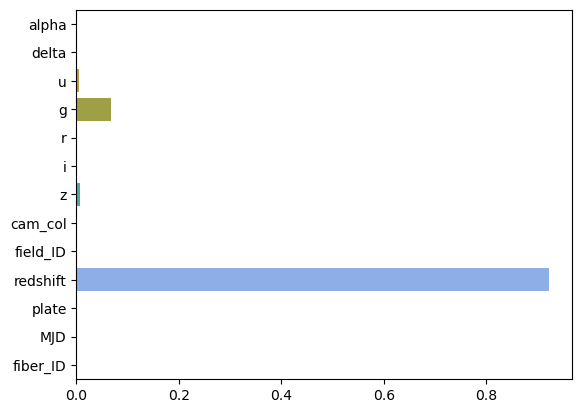

In [40]:
# 각 feature가 target에 미치는 영향을 바 플롯으로 시각화
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

In [41]:
from sklearn.inspection import permutation_importance

# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(dtc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([ 9,  2,  6,  3,  5, 11,  4,  1, 12, 10,  8,  7,  0], dtype=int64)

In [42]:
# 각 컬럼 별 중요도 출력
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

redshift: 0.4971
u: 0.1096
z: 0.0888
g: 0.0564
i: 0.0229
MJD: 0.0095
r: 0.0024
delta: 0.0
fiber_ID: 0.0
plate: 0.0
field_ID: 0.0
cam_col: 0.0
alpha: 0.0


- 'redshift'가 target에 압도적으로 많은 영향을 미치는 것을 확인
- feature_importance의 경우, 그 다음으로 가장 영향이 큰 것은 'g'이지만
  이는 'redshift'의 1/10 정도 되는 미미한 수준인 것으로 보임
- permutation_importance의 경우, 위와는 달리 'u'의 영향이 크다는 결과를 보임.  
  이는 'u'가 다른 feature들과의 상관관계가 높다는 것을 의미하며, 이는 위의 히트맵에서 확인할 수 있음

#### 산점도 및 분류 영역 시각화
- 이를 통해 현재 모델의 과적합 정도를 확인

In [43]:
import numpy as np

# 데이터의 분포를 산점도로 시각화하고, 모델이 해당 데이터를 분류한 경계와 각 데이터들의 영역을 시각화하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=-1)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [44]:
pd.set_option('display.max_rows', 10)

# feature_importance에서 가장 높은 중요도를 가진 feature 2가지만 가져옴
important_features = features.iloc[:, [3, 9]]

important_features

,g,redshift
0,22.27530,0.634794
1,22.83188,0.779136
2,22.66389,0.644195
3,23.77656,0.932346
4,17.58028,0.116123
...,...,...
78384,19.81625,0.175206
78385,22.38628,0.404895
78386,19.26997,0.143366
78387,21.63757,0.455040


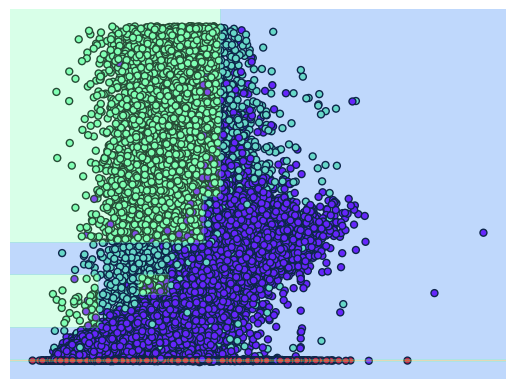

In [45]:
visualize_boundary(dtc, important_features, targets)

In [46]:
# 하이퍼 파라미터 튜닝 후 학습 진행
dtc = DecisionTreeClassifier(max_depth=16, min_samples_split=2500, random_state=124)

dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=16, min_samples_split=2500, random_state=124)

In [47]:
# 현재 모델의 분류 알고리즘을 graphviz로 시각화
export_graphviz(
    dtc,
    out_file="./images/stellar_dtc02.dot",
    class_names=target_encoder.classes_,
    feature_names=features.columns,
    impurity=True,
    filled=True
)

In [48]:
with open('./images/stellar_dtc02.dot') as f:
    stellar_dtc02 = f.read()

stellar_dtc02_graph = graphviz.Source(stellar_dtc02)

stellar_dtc02_graph.render(filename='stellar_dtc02', directory='./images', format='png')

'images\\stellar_dtc02.png'

<img src='./images/stellar_dtc02.png'>

#### 각 feature 별 중요도 시각화

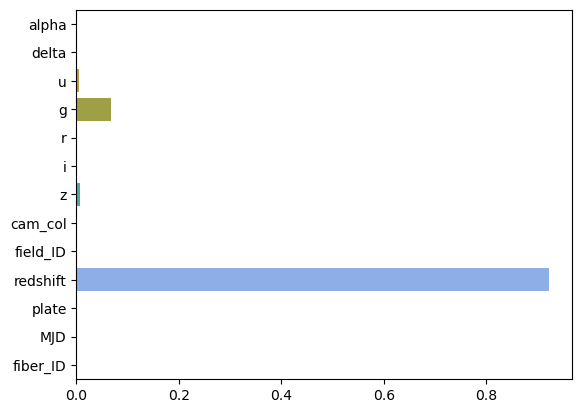

In [49]:
# 각 feature가 target에 미치는 영향을 바 플롯으로 시각화
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

In [50]:
from sklearn.inspection import permutation_importance

# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(dtc, X_test, y_test, n_repeats=10, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

redshift: 0.4951
u: 0.1092
z: 0.0886
g: 0.0566
i: 0.0229
MJD: 0.0093
r: 0.0023
delta: 0.0
fiber_ID: 0.0
plate: 0.0
field_ID: 0.0
cam_col: 0.0
alpha: 0.0


#### 오차 행렬 시각화

In [51]:
# 오차 행렬을 시각화 해주는 함수
# SMOTE를 통해 타겟 데이터의 분포를 균일하게 맞췄기 때문에 macro 방식으로 평균 산출
# 이번 데이터는 다중 분류이기 때문에 ROC-AUC 점수는 산출하지 않음
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    # roc_auc = roc_auc_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'\
          .format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [52]:
# 하이퍼 파라미터 튜닝이 완료된 모델로 테스트 데이터 예측
dtc_prediction = dtc.predict(X_test)

오차 행렬
[[9268  684   77]
 [ 201 1925    1]
 [   0    0 3522]]
정확도: 0.9386, 정밀도: 0.8983, 재현율: 0.9431, F1: 0.9175
################################################################################


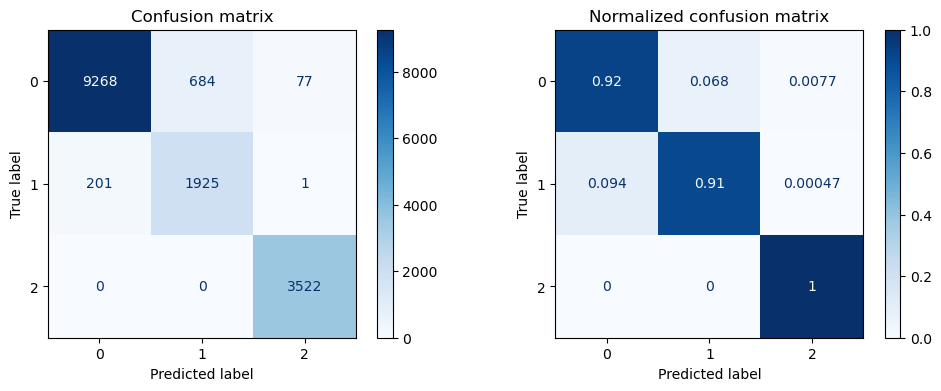

In [53]:
# 현재 모델의 정확도와 오차행렬 출력 및 시각화
get_evaluation(y_test, dtc_prediction, dtc, X_test)

#### 중간 분석 
- 현재 데이터 세트가 다중 분류이기 때문에 Trade-off와 ROC Curve 시각화 불가
- 따라서 이번 프로젝트에서는 위 두 가지 그래프를 시각화하지 않음

#### 산점도 및 분류 영역 시각화

In [54]:
import numpy as np

# 데이터의 분포를 산점도로 시각화하고, 모델이 해당 데이터를 분류한 경계와 각 데이터들의 영역을 시각화하는 함수
# 분류 영역을 정확히 파악하기 위해 산점도의 zorder를 마이너스로 조정
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=-3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

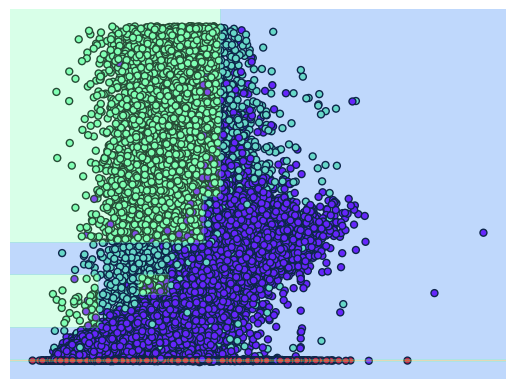

In [55]:
visualize_boundary(dtc, important_features, targets)

#### DTC 모델 학습 결과
- max_depth는 16, in_samples_split은 2500인 모델이 가장 높은 평가 점수를 받음
- 따라서 하이퍼 파라미터 튜닝 후 학습을 진행, 평가 지표가 약 0.9 또는 그보다 더 높은 점수를 보였으며,  
  특히 2(STAR)에 대한 적중률이 높은 것을 확인
- 산점도와 분류 영역 시각화 결과, 과적합이 발생하지 않음

### 2. SVM (서포트 벡터 머신)

In [56]:
from sklearn.svm import SVC

# SVC에서 사용하는 하이퍼 파라미터 설정
svc_parameters = {'C': [0.01, 0.1, 1, 10, 100],
                 'gamma': [0.01, 0.1, 1, 10, 100],
                 'kernel': ['linear', 'rbf']}

# SVC 모델 생성
svc = SVC(probability=True, random_state=124)

g_svc = GridSearchCV(svc, param_grid=svc_parameters, cv=3, refit=True, return_train_score=True)

#### ⚠️ 이슈 발생
- 현재 SVM 모델의 학습 시간이 매우 오래 걸리는 이슈 발생
> - 이는 경제적인 측면에서 보더라도 큰 손해가 발생한다는 문제가 있음

- 따라서 이하의 다른 모델로 학습 진행

In [ ]:
# SVC 모델로 학습 진행
# g_svc.fit(X_train_over, y_train_over)

In [ ]:
# pd.set_option('display.max_rows', None)

# # 하이퍼 파라미터 조합 별 평가 점수 및 순위를 데이터프레임에 담아서 출력
# svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
# display(svc_result_df)

In [ ]:
# # 평가 순위가 가장 높은 하이퍼 파라미터의 조합 출력
# for params in svc_result_df[svc_result_df['rank_test_score'] == 1]['params']:
#     print(params)

In [ ]:
# # 가장 좋은 평가 점수를 받은 모델을 svc에 할당
# svc = g_svc.best_estimator_

In [ ]:
# # SVC 모델로 테스트 데이터 예측
# svc_prediction = svc.predict(X_test)

In [ ]:
# # SVC 모델의 정확도 및 오차 행렬 출력
# get_evaluation(y_test, svc_prediction, svc, X_test)

### 3. KNN (K-최근접 이웃 알고리즘)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# KNN에 사용할 하이퍼 파라미터 설정
knn_c_parameters = {'n_neighbors': [3, 5, 7, 9]}

knn = KNeighborsClassifier()

# 위 KNN 모델과 하이퍼 파라미터로 교차 검증을 진행하는 모델 생성
g_knn = GridSearchCV(knn, param_grid=knn_c_parameters, cv=3, refit=True, return_train_score=True)

In [60]:
# KNN에 학습 방법만 저장
# Lazy Learning 모델이기 때문에 새로운 데이터가 들어와야 학습을 함
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, return_train_score=True)

In [61]:
# KNN으로 학습한 결과의 교차 검증결과를 데이터프레임 형태로 출력
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 3},0.763962,1
1,{'n_neighbors': 5},0.740770,2
2,{'n_neighbors': 7},0.725847,3
3,{'n_neighbors': 9},0.715443,4


In [62]:
# 위에서 얻은 최적의 하이퍼 파라미터 값을 가진 새로운 KNN 모델 및 파이프라인 생성
# KNN에는 best_estimator가 없기 때문에 재선언해야 됨
knn = KNeighborsClassifier(n_neighbors=3)

# 재선언된 파이프라인을 통해 학습 진행
knn.fit(X_train_over, y_train_over)

KNeighborsClassifier(n_neighbors=3)

In [63]:
# 하이퍼 파라미터를 마친 KNN 모델로 예측
knn_prediction = knn.predict(X_test)

In [64]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(knn, X_test, y_test, n_repeats=3, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

plate: 0.1679
MJD: 0.1192
alpha: 0.0665
field_ID: 0.0566
fiber_ID: 0.0387
delta: 0.0043
u: 0.001
g: 0.001
r: 0.0008
i: 0.0006
z: 0.0005
redshift: 0.0002
cam_col: 0.0


오차 행렬
[[6865 1551 1613]
 [ 671 1018  438]
 [ 895  641 1986]]
정확도: 0.6295, 정밀도: 0.5411, 재현율: 0.5757, F1: 0.5502
################################################################################


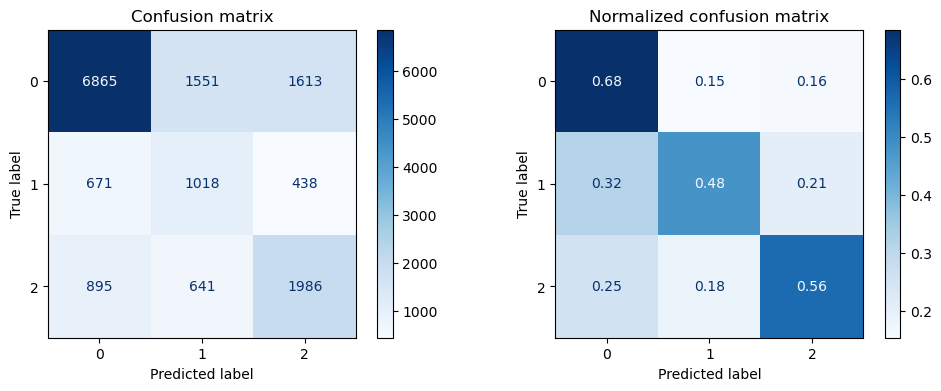

In [65]:
# KNN 모델의 정확도 및 평가 점수 출력
get_evaluation(y_test, knn_prediction, knn, X_test)

In [78]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.iloc[:, [10, 11]]

important_features

,plate,MJD
0,5812,56354
1,10445,58158
2,4576,55592
3,9149,58039
4,6121,56187
...,...,...
78384,1025,53239
78385,7626,56934
78386,2764,54535
78387,6751,56368


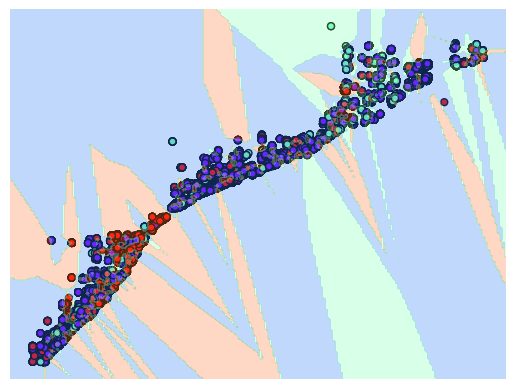

In [79]:
visualize_boundary(knn, important_features, targets)

### KNN 모델 학습 결과
- DTC 모델에 비해 평가 점수가 많이 낮아진 양상을 보임
- 가장 높은 평가를 보인 하이퍼 파라미터로 튜닝했음에도 이러한 현상이 발생한 것으로 보아  
  이 모델이 이번 데이터 세트르르 분류하는 데 다소 부적합하다고 판단

### 앙상블 학습
1. Voting
> - 위의 모델들을 사용하여 Hard Voting과 Soft Voting 진행

2. Bagging
> - Random Forest

3. Boosting
>- Adaboost
>- GBM
>- XGBoost
>- LightGBM

### 4. Voting 

In [70]:
# 하이퍼 파라미터가 최적화된 모델로 재설정
dtc = g_dtc.best_estimator_
knn = KNeighborsClassifier(n_neighbors=3)

#### 4-1. Hard Voting

In [71]:
from sklearn.ensemble import VotingClassifier

# 위의 모델들을 통해 Hard Voting을 실행하는 분류 모델 객체 생성
h_vc = VotingClassifier(estimators=[('dtc', dtc),
                                    ('knn', knn)
                                   ],
                        voting='hard')

In [72]:
# Hard Voting 모델로 학습 진행
h_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=16,
                                                     min_samples_split=2500,
                                                     random_state=124)),
                             ('knn', KNeighborsClassifier(n_neighbors=3))])

In [73]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(h_vc, X_test, y_test, n_repeats=3, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

redshift: 0.1938
plate: 0.1013
MJD: 0.0826
u: 0.0327
z: 0.0254
g: 0.025
alpha: 0.0242
field_ID: 0.0192
fiber_ID: 0.0105
i: 0.0071
r: 0.0017
delta: 0.0011
cam_col: 0.0


In [74]:
# Hard Voting 모델로 테스트 데이터 예측
h_vc_prediction = h_vc.predict(X_test)

오차 행렬
[[9694  306   29]
 [ 761 1366    0]
 [ 895  641 1986]]
정확도: 0.8321, 정밀도: 0.8101, 재현율: 0.7242, F1: 0.7465
################################################################################


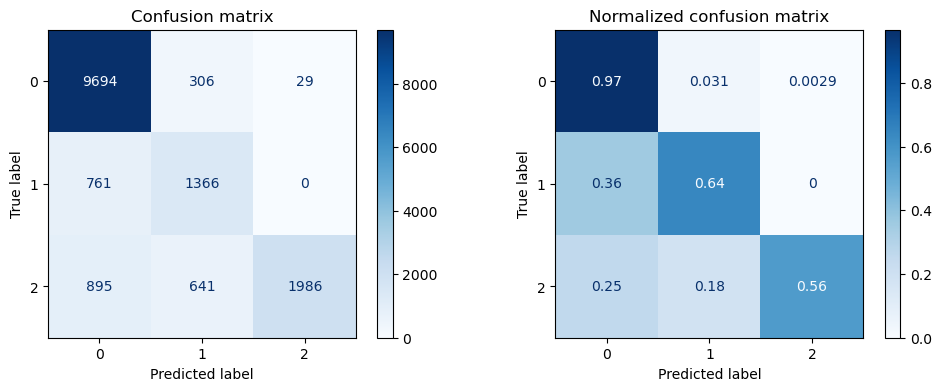

In [75]:
# Hard Voting 모델의 예측 결과 시각화
get_evaluation(y_test, h_vc_prediction, h_vc, X_test)

In [80]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.iloc[:, [9, 10]]

important_features

,redshift,plate
0,0.634794,5812
1,0.779136,10445
2,0.644195,4576
3,0.932346,9149
4,0.116123,6121
...,...,...
78384,0.175206,1025
78385,0.404895,7626
78386,0.143366,2764
78387,0.455040,6751


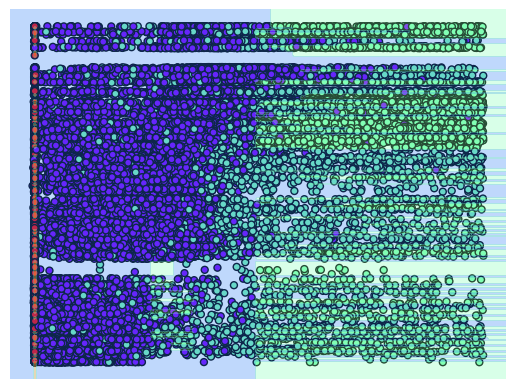

In [81]:
visualize_boundary(h_vc, important_features, targets)

#### Hard Voting 학습 결과
- DTC와 KNN 모델로 학습을 진행한 만큼, 평가 지표가 해당 모델들의 평균 정도로 나타남
- 이에 따라 F1 Score가 0.8에 근접한, 아주 이상적인 수치를 보임

#### 4-2. Soft Voting 

In [82]:
# Soft Voting을 실행하는 분류 모델 객체 생성
so_vc = VotingClassifier(estimators=[('dtc', dtc),
                                    ('knn', knn)
                                   ],
                        voting='soft')

In [83]:
# Soft Voting 모델로 학습 진행
so_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=16,
                                                     min_samples_split=2500,
                                                     random_state=124)),
                             ('knn', KNeighborsClassifier(n_neighbors=3))],
                 voting='soft')

In [84]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(so_vc, X_test, y_test, n_repeats=3, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

redshift: 0.1994
plate: 0.1085
MJD: 0.0927
alpha: 0.0403
u: 0.0342
field_ID: 0.0305
g: 0.021
z: 0.0188
fiber_ID: 0.0187
i: 0.0123
r: 0.001
delta: 0.0008
cam_col: -0.0001


In [85]:
# Soft Voting 모델로 테스트 데이터 예측
so_vc_prediction = so_vc.predict(X_test)

오차 행렬
[[8652  844  533]
 [ 426 1499  202]
 [ 455  328 2739]]
정확도: 0.8222, 정밀도: 0.7524, 재현율: 0.7817, F1: 0.7641
################################################################################


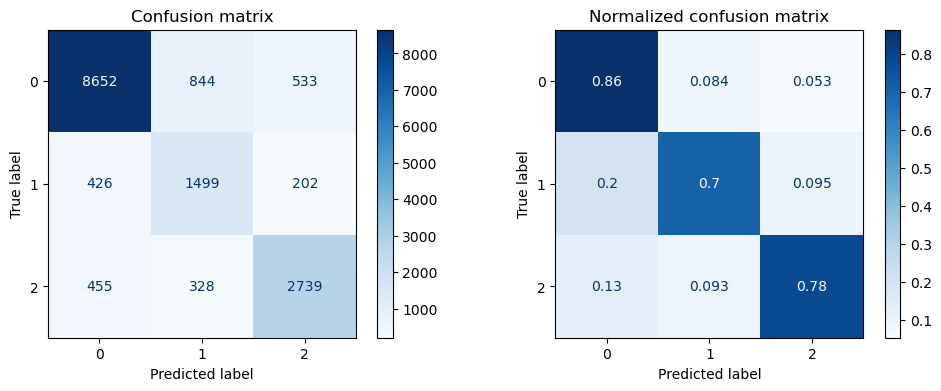

In [86]:
# Soft Voting 모델의 에측 결과 시각화
get_evaluation(y_test, so_vc_prediction, so_vc, X_test)

In [87]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.iloc[:, [9, 10]]

important_features

,redshift,plate
0,0.634794,5812
1,0.779136,10445
2,0.644195,4576
3,0.932346,9149
4,0.116123,6121
...,...,...
78384,0.175206,1025
78385,0.404895,7626
78386,0.143366,2764
78387,0.455040,6751


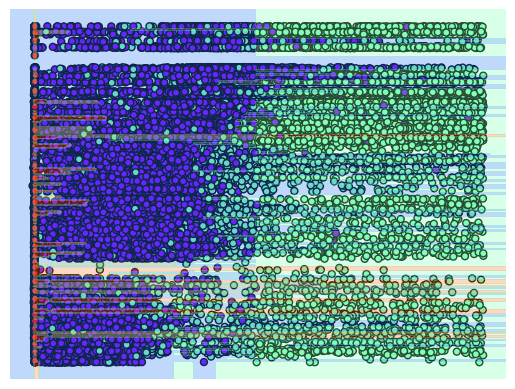

In [88]:
visualize_boundary(so_vc, important_features, targets)

#### Soft Voting 학습 결과
- Hard Voting 보다 0(GALAXY)의 예측 성능은 감소했으며,  
  1(QSO)와 2(STAR)의 예측 성능, 평가 지표가 향상됨을 확인
- 또한 F1 Score 역시 0.8에 더욱 근접함에 따라 현재 이번 데이터의 분석에 가장 적합한 모델로 판단

### 5. Bagging - Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트에 사용할 하이퍼 파라미터 지정
rfc_parameters = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [40, 60, 80]
}

# 랜덤 포레스트 모델 객체 생성
rfc = RandomForestClassifier(n_estimators=10, random_state=124)

# 각 하이퍼 파라미터의 조합 별로 교차 검증하는 모델 생성
g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=3, refit=True, return_train_score=True)

In [90]:
# 위 모델로 학습 진행
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=10,
                                              random_state=124),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [40, 60, 80]},
             return_train_score=True)

In [91]:
# 랜덤 포레스트 모델의 파라미터 조합 별 평가 점수 및 순위를 데이터프레임 형식으로 제작 후 출력
# 가장 좋은 평가 점수를 받은 하이퍼 파라미터 조합도 출력
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 3, 'min_samples_split': 40}",0.902929,7
1,"{'max_depth': 3, 'min_samples_split': 60}",0.902929,7
2,"{'max_depth': 3, 'min_samples_split': 80}",0.902929,7
3,"{'max_depth': 4, 'min_samples_split': 40}",0.948664,4
4,"{'max_depth': 4, 'min_samples_split': 60}",0.948664,4
5,"{'max_depth': 4, 'min_samples_split': 80}",0.948664,4
6,"{'max_depth': 5, 'min_samples_split': 40}",0.953617,3
7,"{'max_depth': 5, 'min_samples_split': 60}",0.953849,2
8,"{'max_depth': 5, 'min_samples_split': 80}",0.954606,1


In [92]:
# 가장 좋은 평가를 받은 파라미터를 랜덤 포레스트 모델에 할당
rfc = g_rfc.best_estimator_

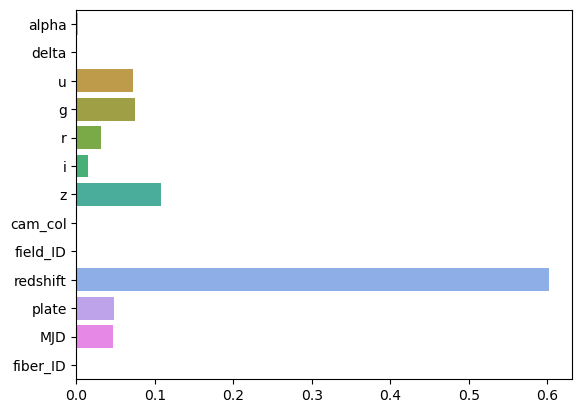

In [93]:
# 각 feature가 target에 미치는 영향을 바 플롯으로 시각화
sns.barplot(x=rfc.feature_importances_, y=features.columns)
plt.show()

In [94]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(rfc, X_test, y_test, n_repeats=3, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

redshift: 0.3657
z: 0.0734
g: 0.0461
u: 0.0343
plate: 0.0085
MJD: 0.0065
r: 0.0051
alpha: 0.0004
cam_col: 0.0001
fiber_ID: 0.0
delta: -0.0
field_ID: -0.0001
i: -0.0003


In [95]:
# 위 모델로 테스트 데이터 예측
rfc_prediction = rfc.predict(X_test)

오차 행렬
[[9453  498   78]
 [ 252 1871    4]
 [   0    0 3522]]
정확도: 0.9469, 정밀도: 0.9137, 재현율: 0.9407, F1: 0.9263
################################################################################


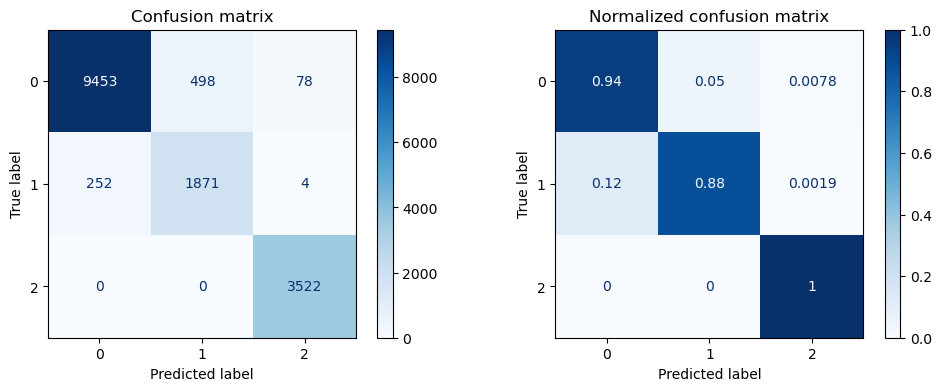

In [96]:
# 랜덤 포레스트 모델의 정확도 및 오차 행렬 출력
get_evaluation(y_test, rfc_prediction, rfc, X_test)

In [98]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.iloc[:, [6, 9]]

important_features

,z,redshift
0,18.79371,0.634794
1,21.61427,0.779136
2,18.94827,0.644195
3,19.25010,0.932346
4,15.54461,0.116123
...,...,...
78384,19.05790,0.175206
78385,19.41526,0.404895
78386,17.35221,0.143366
78387,18.62482,0.455040


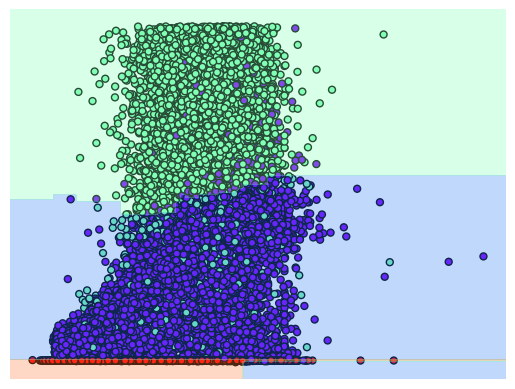

In [99]:
visualize_boundary(rfc, important_features, targets)

#### Random Forest 학습 결과
- DTC와 비슷한 모델이니만큼, 시각화 결과 역시 DTC와 유사한 양상을 보임
- 다만, F1 Score가 높게 측정된 만큼 이번 프로젝트의 방향성과는 맞지 않는다고 판단

### 6. Boosting (부스팅)

> 1. Adaboost (Adaptive Boost)
> 2. GBM (Gradient Boosting Machine)
> 3. XGBoost (EXtra Gradient Boost)
> 4. LightGBM (Light Gradient Boosting Machine)

#### 6-1. Adaboost

In [100]:
from sklearn.ensemble import AdaBoostClassifier

# Adaboost의 교차 검증에 사용할 하이퍼 파라미터
ada_parameters = {
    'n_estimators': [10, 15, 20],
    'learning_rate': [0.3, 0.5, 0.7]
}

# 표준화와 Adaboost를 거치는 파이프라인 생성 후, 해당 모델로 교차 검증
ada = AdaBoostClassifier(random_state=124)

g_ada = GridSearchCV(ada, param_grid=ada_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

In [101]:
# 위 모델로 학습 및 교차 검증 진행
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=124), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7],
                         'n_estimators': [10, 15, 20]},
             return_train_score=True)

In [102]:
# 교차 검증 결과를 데이터프레임에 담아서 출력하고, 가장 좋은 평가를 받았을 때의 하이퍼 파라미터도 출력
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(ada_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 10}",0.663351,9
1,"{'learning_rate': 0.3, 'n_estimators': 15}",0.666376,8
2,"{'learning_rate': 0.3, 'n_estimators': 20}",0.666417,7
3,"{'learning_rate': 0.5, 'n_estimators': 10}",0.739191,6
4,"{'learning_rate': 0.5, 'n_estimators': 15}",0.742848,4
5,"{'learning_rate': 0.5, 'n_estimators': 20}",0.742374,5
6,"{'learning_rate': 0.7, 'n_estimators': 10}",0.750484,2
7,"{'learning_rate': 0.7, 'n_estimators': 15}",0.747626,3
8,"{'learning_rate': 0.7, 'n_estimators': 20}",0.754356,1


In [103]:
# 가장 좋은 평가를 받은 파라미터를 Adaboost 모델에 할당하고, 해당 모델로 테스트 데이터 예측
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)

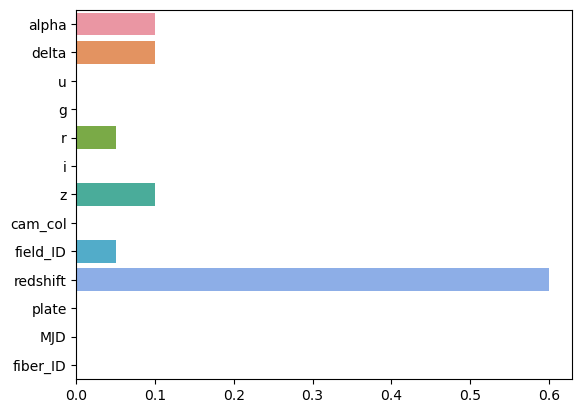

In [104]:
# 각 feature가 target에 미치는 영향을 바 플롯으로 시각화
sns.barplot(x=ada.feature_importances_, y=features.columns)
plt.show()

In [105]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(ada, X_test, y_test, n_repeats=3, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

redshift: 0.3152
delta: 0.0036
alpha: 0.002
fiber_ID: 0.0
MJD: 0.0
plate: 0.0
cam_col: 0.0
i: 0.0
g: 0.0
u: 0.0
field_ID: -0.0003
z: -0.0026
r: -0.0026


오차 행렬
[[9872   79   78]
 [2109   17    1]
 [   0    0 3522]]
정확도: 0.8554, 정밀도: 0.6597, 재현율: 0.6641, F1: 0.6338
################################################################################


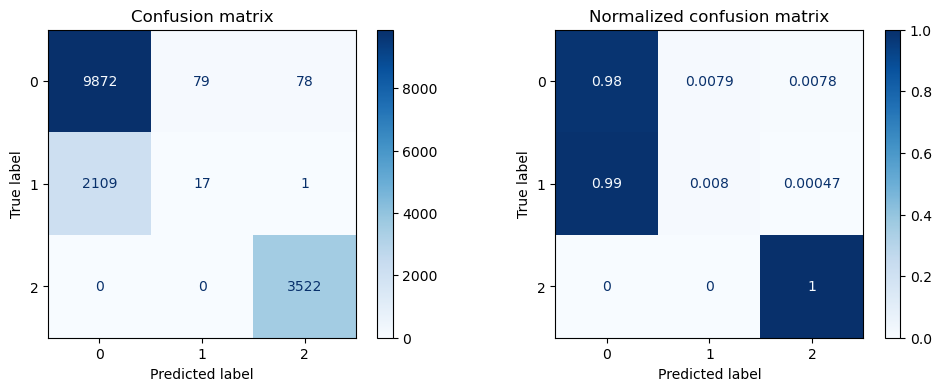

In [106]:
# 위 모델의 오차 행렬 시각화
get_evaluation(y_test, ada_prediction, ada, X_test)

In [107]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.iloc[:, [3, 9]]

important_features

,g,redshift
0,22.27530,0.634794
1,22.83188,0.779136
2,22.66389,0.644195
3,23.77656,0.932346
4,17.58028,0.116123
...,...,...
78384,19.81625,0.175206
78385,22.38628,0.404895
78386,19.26997,0.143366
78387,21.63757,0.455040


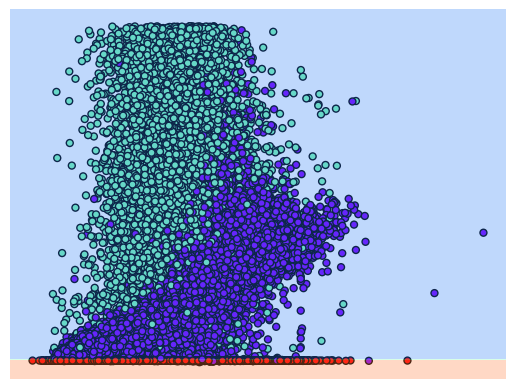

In [108]:
visualize_boundary(ada, important_features, targets)

#### Adaboost 학습 결과
- 1(QSO)의 예측성능은 0에 근접하며, 0(GALAXY)로 예측하는 경향이 매우 강함
- 이에 따라 이 모델의 신뢰성에 문제가 있다고 볼 수 있음
- 만약 하이퍼 파라미터를 조정한다면 이 문제를 해소할 수 있을 것으로 추정

#### 6-2. GBM (Gradient Boosting Machine)

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

# GBM의 교차 검증에 사용할 하이퍼 파라미터
gbm_parameters = {
    'loss': ['log_loss', 'exponential'],
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.3, 0.5, 0.7],
    'subsample': [0.3, 0.5, 0.7]
}

# 표준화와 GBM을 거치는 파이프라인 생성 후, 해당 모델로 교차 검증
gbm = GradientBoostingClassifier(random_state=124)

g_gbm = GridSearchCV(gbm, param_grid=gbm_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

In [110]:
# 위 모델로 학습 및 교차 검증 진행
g_gbm.fit(X_train_over, y_train_over)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
81 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 444, in fit
    self._check_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 301, in _check_params
    self._loss = loss_class(self.n_classes_)
                 ^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=124),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [10, 20, 30],
                         'subsample': [0.3, 0.5, 0.7]},
             return_train_score=True)

In [111]:
# 교차 검증 결과를 데이터프레임에 담아서 출력하고, 가장 좋은 평가를 받았을 때의 하이퍼 파라미터도 출력
gbm_result_df = pd.DataFrame(g_gbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbm_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'loss': 'log_loss', 'n_...",0.965890,27
1,"{'learning_rate': 0.3, 'loss': 'log_loss', 'n_...",0.966031,26
2,"{'learning_rate': 0.3, 'loss': 'log_loss', 'n_...",0.966222,25
3,"{'learning_rate': 0.3, 'loss': 'log_loss', 'n_...",0.970061,15
4,"{'learning_rate': 0.3, 'loss': 'log_loss', 'n_...",0.970427,12
...,...,...,...
49,"{'learning_rate': 0.7, 'loss': 'exponential', ...",NaN,28
50,"{'learning_rate': 0.7, 'loss': 'exponential', ...",NaN,28
51,"{'learning_rate': 0.7, 'loss': 'exponential', ...",NaN,28
52,"{'learning_rate': 0.7, 'loss': 'exponential', ...",NaN,28


In [113]:
# 평가 순위가 가장 높은 하이퍼 파라미터의 조합 출력
for params in gbm_result_df[gbm_result_df['rank_test_score'] == 1]['params']:
    print(params)

{'learning_rate': 0.5, 'loss': 'log_loss', 'n_estimators': 30, 'subsample': 0.7}


In [114]:
# best_estimator를 쓸 수 없었기 때문에, 하이퍼 파라미터 튜닝을 마친 GBM 모델과 파이프라인 생성 후 학습
gbm = GradientBoostingClassifier(learning_rate=0.5,
                                 loss='log_loss',
                                 n_estimators=30,
                                 subsample=0.7,
                                 random_state=124)

gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=30, random_state=124,
                           subsample=0.7)

In [115]:
# 위 모델로 테스트 데이터 예측
gbm_prediction = gbm.predict(X_test)

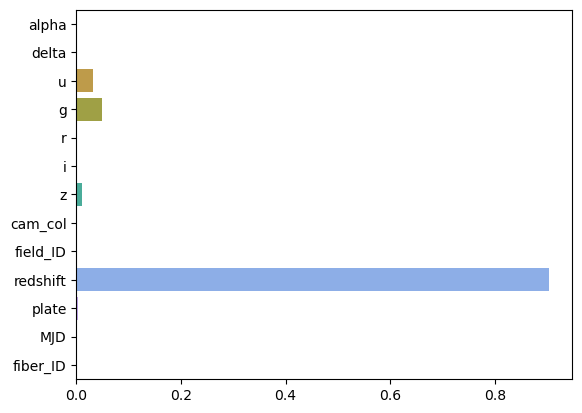

In [116]:
# 각 feature가 target에 미치는 영향을 바 플롯으로 시각화
sns.barplot(x=gbm.feature_importances_, y=features.columns)
plt.show()

In [117]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(gbm, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

redshift: 0.4909
g: 0.0745
u: 0.0357
plate: 0.0122
z: 0.0105
delta: 0.0044
r: 0.0037
i: 0.0033
alpha: 0.0025
MJD: 0.0007
field_ID: 0.0003
fiber_ID: 0.0
cam_col: -0.0002


오차 행렬
[[9672  316   41]
 [ 183 1943    1]
 [   5    0 3517]]
정확도: 0.9652, 정밀도: 0.9431, 재현율: 0.9588, F1: 0.9507
################################################################################


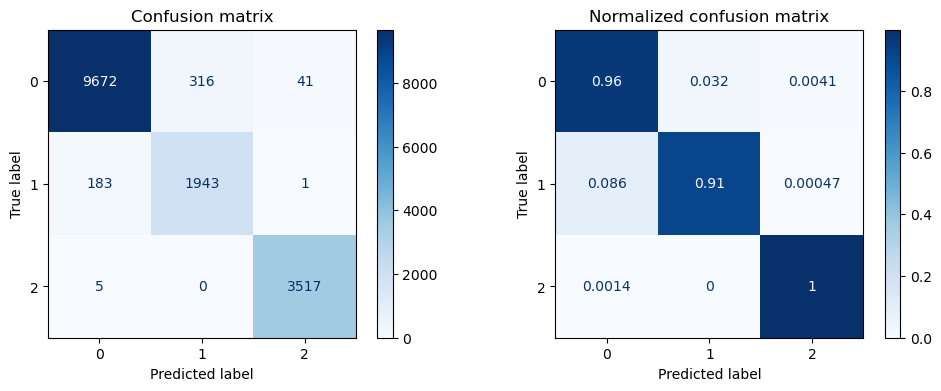

In [119]:
# 위 모델의 정확도 및 오차 행렬 시각화
get_evaluation(y_test, gbm_prediction, gbm, X_test)

In [120]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.iloc[:, [3, 9]]

important_features

,g,redshift
0,22.27530,0.634794
1,22.83188,0.779136
2,22.66389,0.644195
3,23.77656,0.932346
4,17.58028,0.116123
...,...,...
78384,19.81625,0.175206
78385,22.38628,0.404895
78386,19.26997,0.143366
78387,21.63757,0.455040


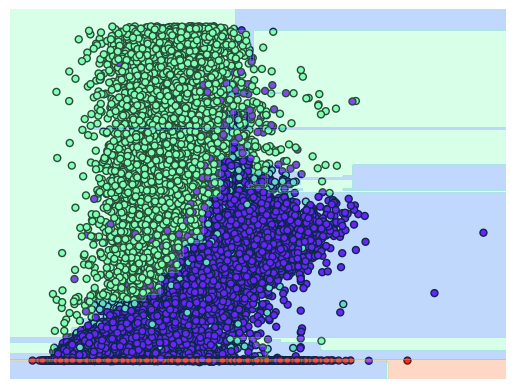

In [121]:
visualize_boundary(gbm, important_features, targets)

#### XGB 학습 결과
- 예측 성능과 평가 지표는 0.95 이상으로 매우 높게 측정됨
- 다만, fit 과정에서 에러가 발생함에 따라 원인 분석 필요

#### 6-3. XGBoost 

In [122]:
from xgboost import XGBClassifier

# 학습용 데이터를 한 번 더 분리하여 evalset에 사용할 데이터 생성
X_val_train, X_val_test, y_val_train, y_val_test = \
                train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

# SMOTE로 위 데이터 오버 샘플링
X_val_train_over, y_val_train_over = smote.fit_resample(X_val_train, y_val_train)

# evalset 생성
evals = [(X_val_train_over, y_val_train_over), (X_val_test, y_val_test)]

In [123]:
# XGBoost의 교차 검증에 사용할 하이퍼 파라미터
xgb_parameters = {
    'n_estimators': [10, 15, 20],
    'learning_rate': [0.5, 0.7],
    'subsample': [0.5, 0.7],
    'early_stopping_rounds': [5, 10]
}

# XGBoost 모델로 교차 검증
xgb = XGBClassifier(seed=124)

g_xgb = GridSearchCV(xgb, param_grid=xgb_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

In [125]:
# 위 모델로 교차 검증 진행
g_xgb.fit(X_train_over, y_train_over, eval_set=evals)

[0]	validation_0-mlogloss:0.40435	validation_1-mlogloss:0.41724
[1]	validation_0-mlogloss:0.22194	validation_1-mlogloss:0.23720
[2]	validation_0-mlogloss:0.14329	validation_1-mlogloss:0.15875
[3]	validation_0-mlogloss:0.10723	validation_1-mlogloss:0.12337
[4]	validation_0-mlogloss:0.08931	validation_1-mlogloss:0.10631
[5]	validation_0-mlogloss:0.07989	validation_1-mlogloss:0.09763
[6]	validation_0-mlogloss:0.07474	validation_1-mlogloss:0.09160
[7]	validation_0-mlogloss:0.07134	validation_1-mlogloss:0.08829
[8]	validation_0-mlogloss:0.06821	validation_1-mlogloss:0.08558
[9]	validation_0-mlogloss:0.06575	validation_1-mlogloss:0.08183
[10]	validation_0-mlogloss:0.06370	validation_1-mlogloss:0.07891
[11]	validation_0-mlogloss:0.06175	validation_1-mlogloss:0.07538
[12]	validation_0-mlogloss:0.06048	validation_1-mlogloss:0.07453
[13]	validation_0-mlogloss:0.05832	validation_1-mlogloss:0.07124
[14]	validation_0-mlogloss:0.05705	validation_1-mlogloss:0.06926
[15]	validation_0-mlogloss:0.05542	

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'early_stopping_rounds': [5, 10],
                         'learning_rate': [0.5, 0.7],
                         'n_estimators': [10, 15, 20],
                         'subsample': [0.5, 0.7]},
             return_train_score=True)

In [126]:
# 교차 검증 결과를 데이터프레임에 담아서 출력하고, 가장 좋은 평가를 받았을 때의 하이퍼 파라미터도 출력
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

for params in xgb_result_df[xgb_result_df['rank_test_score'] == 1]['params']:
    print(params)

display(xgb_result_df)

{'early_stopping_rounds': 5, 'learning_rate': 0.7, 'n_estimators': 20, 'subsample': 0.7}
{'early_stopping_rounds': 10, 'learning_rate': 0.7, 'n_estimators': 20, 'subsample': 0.7}


,params,mean_test_score,rank_test_score
0,"{'early_stopping_rounds': 5, 'learning_rate': ...",0.973310,23
1,"{'early_stopping_rounds': 5, 'learning_rate': ...",0.973435,21
2,"{'early_stopping_rounds': 5, 'learning_rate': ...",0.974407,15
3,"{'early_stopping_rounds': 5, 'learning_rate': ...",0.974540,13
4,"{'early_stopping_rounds': 5, 'learning_rate': ...",0.975412,7
...,...,...,...
19,"{'early_stopping_rounds': 10, 'learning_rate':...",0.974050,17
20,"{'early_stopping_rounds': 10, 'learning_rate':...",0.975105,11
21,"{'early_stopping_rounds': 10, 'learning_rate':...",0.975296,9
22,"{'early_stopping_rounds': 10, 'learning_rate':...",0.975820,3


In [127]:
# 가장 좋은 평가를 받은 파라미터를 XGboost 모델에 할당하고, 해당 모델로 테스트 데이터 예측
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)

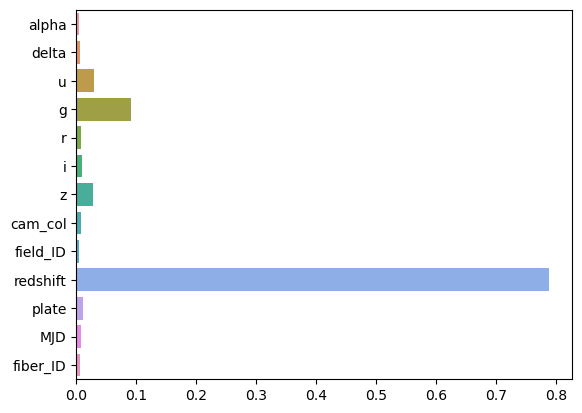

In [128]:
# 각 feature가 target에 미치는 영향을 바 플롯으로 시각화
sns.barplot(x=xgb.feature_importances_, y=features.columns)
plt.show()

In [129]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(xgb, X_test, y_test, n_repeats=3, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

redshift: 0.4993
g: 0.0932
u: 0.0469
plate: 0.0129
r: 0.0094
z: 0.0073
MJD: 0.0041
i: 0.003
delta: 0.0015
alpha: 0.0006
cam_col: 0.0006
field_ID: 0.0002
fiber_ID: -0.0001


오차 행렬
[[9721  274   34]
 [ 175 1951    1]
 [   9    0 3513]]
정확도: 0.9686, 정밀도: 0.9495, 재현율: 0.9613, F1: 0.9552
################################################################################


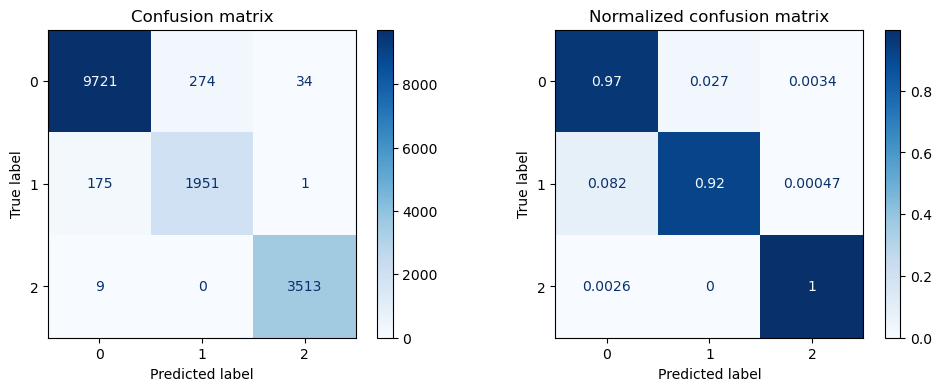

In [130]:
# 위 XGB 모델의 정확도 및 오차 행렬 시각화
get_evaluation(y_test, xgb_prediction, xgb, X_test)

#### XGBoost 학습 결과
- 전반적으로 이전 모델과 비슷한 양상을 보임
- 이에 따라 F1 Score가 높게 측정됨

#### 6-4. LightGBM

In [131]:
from lightgbm import LGBMClassifier

# LightGBM의 교차 검증에 사용할 하이퍼 파라미터
lgbm_parameters = {
    'n_estimators': [10, 15, 20],
    'learning_rate': [0.5, 0.7],
    'subsample': [0.5, 0.7]
}

# LightGBM 모델 객체를 만든 뒤, 위의 하이퍼 파라미터 별로 교차 검증
lgbm = LGBMClassifier(seed=124)
g_lgbm = GridSearchCV(lgbm, param_grid=lgbm_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

In [132]:
# 위 모델로 학습 및 교차 검증 실행
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3067
[LightGBM] [Info] Number of data points in the train set: 120345, number of used features: 13
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


GridSearchCV(cv=3, estimator=LGBMClassifier(seed=124), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.7],
                         'n_estimators': [10, 15, 20],
                         'subsample': [0.5, 0.7]},
             return_train_score=True)

In [133]:
# 위 모델의 학습 결과를 데이터프레잉으로 작성 후 출력
# 가장 좋은 평가를 받은 하이퍼 파라미터 조합도 확인
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

for params in lgbm_result_df[lgbm_result_df['rank_test_score'] == 1]['params']:
    print(params)

display(lgbm_result_df)

{'learning_rate': 0.5, 'n_estimators': 10, 'subsample': 0.5}
{'learning_rate': 0.5, 'n_estimators': 10, 'subsample': 0.7}


,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.5, 'n_estimators': 10, 'su...",0.974091,1
1,"{'learning_rate': 0.5, 'n_estimators': 10, 'su...",0.974091,1
2,"{'learning_rate': 0.5, 'n_estimators': 15, 'su...",0.973709,3
3,"{'learning_rate': 0.5, 'n_estimators': 15, 'su...",0.973709,3
4,"{'learning_rate': 0.5, 'n_estimators': 20, 'su...",0.972571,5
...,...,...,...
7,"{'learning_rate': 0.7, 'n_estimators': 10, 'su...",0.970909,7
8,"{'learning_rate': 0.7, 'n_estimators': 15, 'su...",0.964552,9
9,"{'learning_rate': 0.7, 'n_estimators': 15, 'su...",0.964552,9
10,"{'learning_rate': 0.7, 'n_estimators': 20, 'su...",0.963048,11


In [134]:
# 가장 좋은 평가 점수를 받은 하이퍼 파라미터로 튜닝한 모델을 lgbm 변수에 저장
lgbm = g_lgbm.best_estimator_

In [135]:
# 해당 모델로 테스트 데이터 예측
lgbm_prediction = lgbm.predict(X_test)

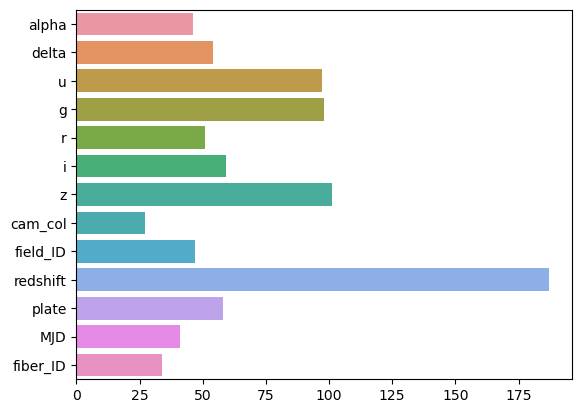

In [136]:
# 각 feature가 target에 미치는 영향을 바 플롯으로 시각화
sns.barplot(x=lgbm.feature_importances_, y=features.columns)
plt.show()

In [137]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(lgbm, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

redshift: 0.4816
g: 0.0745
u: 0.0602
z: 0.0167
plate: 0.0132
delta: 0.004
i: 0.0025
r: 0.0019
MJD: 0.0012
field_ID: 0.0005
alpha: 0.0005
cam_col: 0.0001
fiber_ID: -0.0002


오차 행렬
[[9715  291   23]
 [ 187 1938    2]
 [   3    0 3519]]
정확도: 0.9677, 정밀도: 0.9477, 재현율: 0.9597, F1: 0.9535
################################################################################


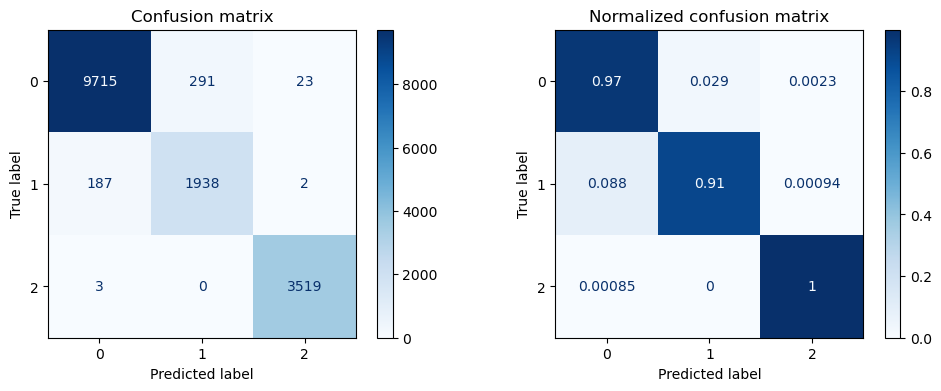

In [138]:
# LightGBM 모델의 정확도 및 오차 행렬 출력
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

#### LightGBM 학습 결과
- XGBoost에 비해 향상된 성능을 보임
- 다만, 예측 성능이 높음에 따라 과적합을 의심할 수 있음

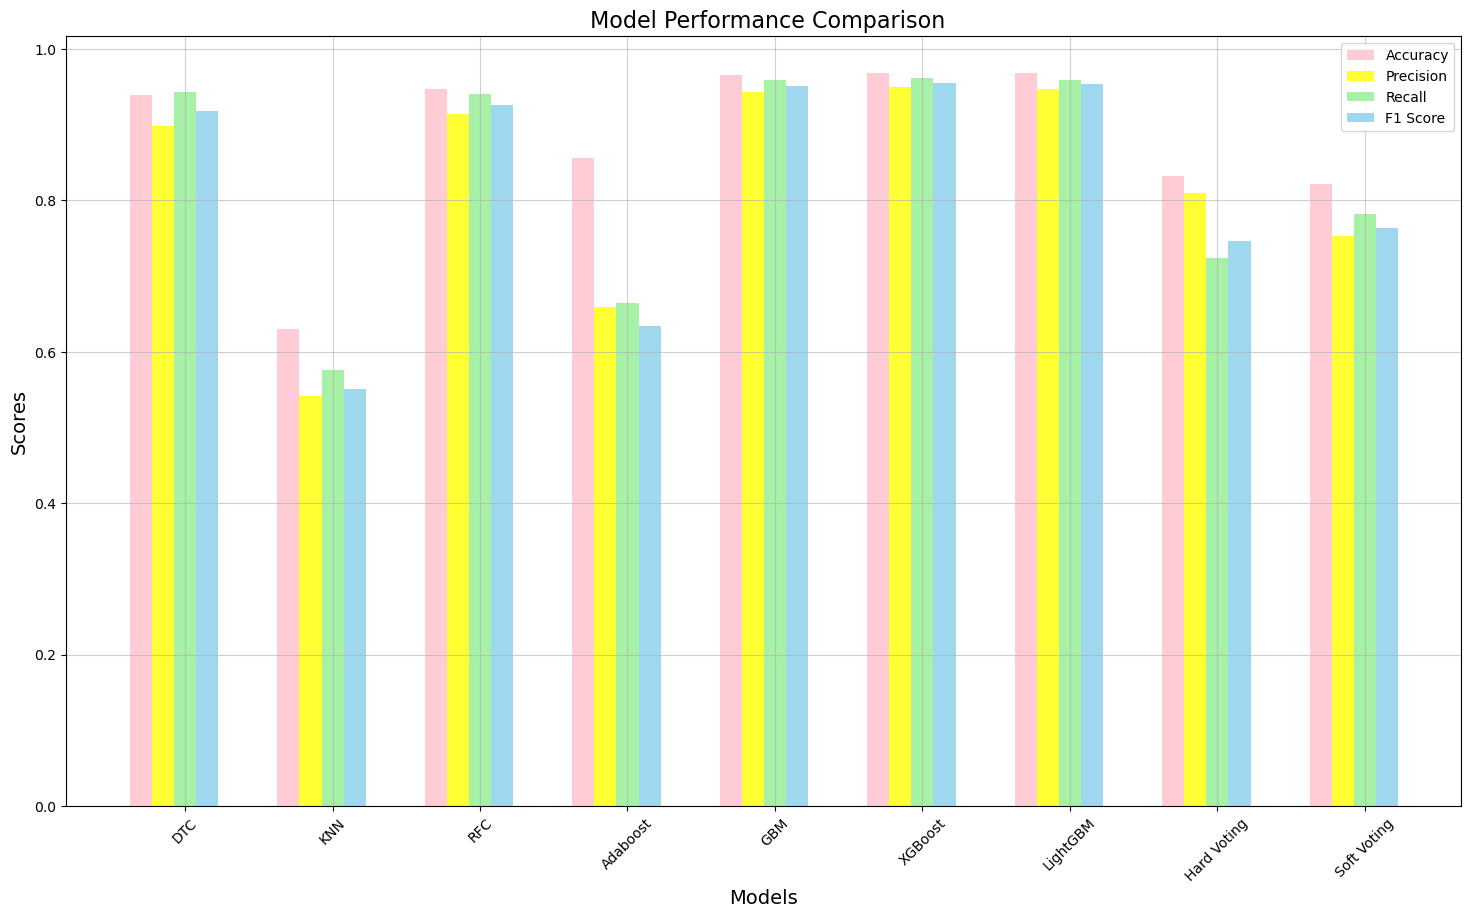

In [141]:
 import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
models = [
    "DTC", "KNN", "RFC", "Adaboost", "GBM",
    "XGBoost", "LightGBM", "Hard Voting", "Soft Voting"
]

# 모델 별 정확도
accuracies = [accuracy_score(y_test, dtc_prediction), accuracy_score(y_test, knn_prediction),
              accuracy_score(y_test, rfc_prediction), accuracy_score(y_test, ada_prediction),
              accuracy_score(y_test, gbm_prediction), accuracy_score(y_test, xgb_prediction),
              accuracy_score(y_test, lgbm_prediction), accuracy_score(y_test, h_vc_prediction),
              accuracy_score(y_test, so_vc_prediction)]

# 모델 별 정밀도
precisions = [precision_score(y_test, dtc_prediction, average='macro'),
              precision_score(y_test, knn_prediction, average='macro'),
              precision_score(y_test, rfc_prediction, average='macro'),
              precision_score(y_test, ada_prediction, average='macro'),
              precision_score(y_test, gbm_prediction, average='macro'),
              precision_score(y_test, xgb_prediction, average='macro'),
              precision_score(y_test, lgbm_prediction, average='macro'),
              precision_score(y_test, h_vc_prediction, average='macro'),
              precision_score(y_test, so_vc_prediction, average='macro')]

# 모델 별 재현율
recalls = [recall_score(y_test, dtc_prediction, average='macro'),
           recall_score(y_test, knn_prediction, average='macro'),
           recall_score(y_test, rfc_prediction, average='macro'),
           recall_score(y_test, ada_prediction, average='macro'),
           recall_score(y_test, gbm_prediction, average='macro'),
           recall_score(y_test, xgb_prediction, average='macro'),
           recall_score(y_test, lgbm_prediction, average='macro'),
           recall_score(y_test, h_vc_prediction, average='macro'),
           recall_score(y_test, so_vc_prediction, average='macro')]

# 모델 별 F1 Score
f1_scores = [f1_score(y_test, dtc_prediction, average='macro'),
             f1_score(y_test, knn_prediction, average='macro'),
             f1_score(y_test, rfc_prediction, average='macro'),
             f1_score(y_test, ada_prediction, average='macro'),
             f1_score(y_test, gbm_prediction, average='macro'),
             f1_score(y_test, xgb_prediction, average='macro'),
             f1_score(y_test, lgbm_prediction, average='macro'),
             f1_score(y_test, h_vc_prediction, average='macro'),
             f1_score(y_test, so_vc_prediction, average='macro')]


# 그래프 설정
n_groups = len(models)
index = np.arange(n_groups)
bar_width = 0.15

fig, ax = plt.subplots(figsize=(18, 10))
bar1 = ax.bar(index, accuracies, bar_width, label='Accuracy', alpha=0.8, color='pink')
bar2 = ax.bar(index + bar_width, precisions, bar_width, label='Precision', alpha=0.8, color='yellow')
bar3 = ax.bar(index + 2*bar_width, recalls, bar_width, label='Recall', alpha=0.8, color='lightgreen')
bar4 = ax.bar(index + 3*bar_width, f1_scores, bar_width, label='F1 Score', alpha=0.8, color='skyblue')

# 레이블, 타이틀, 범례 설정
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Model Performance Comparison', fontsize=16)
ax.set_xticks(index + 2*bar_width)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# 그리드 추가
plt.grid(True, linestyle='solid', alpha=0.6)
plt.show()

### 📑 최종 정리
- 이번 데이터 세트에 대한 학습 결과, 개별 모델 학습에서는 DTC,  
  앙상블 학습에서는 XGBoost가 F1 Score에서 가장 우수한 평가를 기록했습니다.
- 다만, 이번 프로젝트의 목표가 F1 Score가 0.8에 근접한 모델을 찾는 것이니만큼,  
  이번 데이터 세트의 분류에는 Soft Voting이 가장 적합하다고 볼 수 있습니다.

### ☕ 회고
- 이번 데이터 세트에 대한 전처리 과정이 다소 부적절하여 좋은 결과를 얻지 못했습니다.
- 또한, 다중 분류 모델임에도 산점도와 분류 영역을 타겟의 값 별로 나누지 않고 한 그래프에 모두 표시하는,  
  무분별하게 사각화를 진행한 것도 반성해야 할 사안입니다.